# **Geospatial Analysis of Global Suicide rates and Temperature Differences: A Longitudinal study (2000 - 2019)** 

# Harsha [20252236]

### CIS7017

### **1.1 Importing and Installing libraries**

In [ ]:
# Libraries to work with datasets
import pandas as pd # Pandas is used to work with datasets
import geopandas as gpd # Geopandas is used to work with geospatial data

# Libraries to do visualizations
import matplotlib.pyplot as plt # To do visualizations
import seaborn as sns # To draw attractive and informative statistical diagram like heatmap. Used to plot the null values.

# Libraries to do analysis
import numpy as np # Used to find standard deviation in the study
from sklearn.model_selection import train_test_split # Used to split train and test data for regression model 
from sklearn import linear_model # Model to do regression
from sklearn.metrics import r2_score # Used to find the R-squared value
from sklearn import metrics #To check the accuracy

### **1.2 Importing datasets**

For the analysis we require two datasets, the ***suicide data*** and ***temperature change*** dataset for the years ***2000 to 2019*** for vaious countries worldwide.

In [7]:
# Use skiprows to skip the meta lines in the csv
suicide_df = pd.read_csv('Suicide_rate.csv', skiprows = 4) # Read the dataset Suicide_rate.csv that contains the data of suicides for different countries
suicide_df.head() # Reading the first 5 rows using head function to analyse the data

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                    Indicator Name  Indicator Code  1960  \
0  Suicide mortality rate (per 100,000 population)  SH.STA.SUIC.P5   NaN   
1  Suicide mortality rate (per 100,000 population)  SH.STA.SUIC.P5   NaN   
2  Suicide mortality rate (per 100,000 population)  SH.STA.SUIC.P5   NaN   
3  Suicide mortality rate (per 100,000 population)  SH.STA.SUIC.P5   NaN   
4  Suicide mortality rate (per 100,000 population)  SH.STA.SUIC.P5   NaN   

   1961  1962  1963  1964  1965  ...      2014      2015      2016      2017  \
0   NaN   NaN   NaN   NaN   NaN  ...       NaN       NaN       NaN       NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  8.565287  8.489758  8.328658  8.232943   
2   NaN   NaN   NaN   NaN   NaN  ...  3.900000  4.000000  4.000000  4.100000   
3   NaN   NaN   NaN   NaN   NaN  ...  6.001738  5.774544  5.680857  5.567861   
4   NaN   NaN   NaN   NaN   NaN  ...  6.400000  6.500000  6.200000  6.000000   

       2018      2019  2020  2021  2022  Unnamed: 67  
0       NaN       NaN   NaN   NaN   NaN          NaN  
1  8.118032  8.024906   NaN   NaN   NaN          NaN  
2  4.100000  4.100000   NaN   NaN   NaN          NaN  
3  5.439667  5.420255   NaN   NaN   NaN          NaN  
4  6.000000  6.100000   NaN   NaN   NaN          NaN  

[5 rows x 68 columns]

In [8]:
temp_df = pd.read_csv('Temperature_change.csv') # Reading the temperature_change.csv dataset
temp_df.head() # Analysing the first five rows of the dataset

ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of the Unite...     ECCS   
3  Food and Agriculture Organization of the Unite...     ECCS   
4  Food and Agriculture Organization of the Unite...     ECCS   

                     CTS_Name  \
0  Surface Temperature Change   
1  Surface Temperature Change   
2  Surface Temperature Change   
3  Surface Temperature Change   
4  Surface Temperature Change   

                                 CTS_Full_Descriptor  ...  F2013  F2014  \
0  Environment, Climate Change, Climate Indicator...  ...  1.281  0.456   
1  Environment, Climate Change, Climate Indicator...  ...  1.333  1.198   
2  Environment, Climate Change, Climate Indicator...  ...  1.192  1.690   
3  Environment, Climate Change, Climate Indicator...  ...  1.257  1.170   
4  Environment, Climate Change, Climate Indicator...  ...  0.831  1.946   

   F2015  F2016  F2017  F2018  F2019  F2020  F2021  F2022  
0  1.093  1.555  1.540  1.544  0.910  0.498  1.327  2.012  
1  1.569  1.464  1.121  2.028  1.675  1.498  1.536  1.518  
2  1.121  1.757  1.512  1.210  1.115  1.926  2.330  1.688  
3  1.009  1.539  1.435  1.189  1.539  1.430  1.268  1.256  
4  1.690  1.990  1.925  1.919  1.964  2.562  1.533  3.243  

[5 rows x 72 columns]

### **1.3 Exploratory data analysis**

EDA on suicide dataset

In [9]:
# Analyse the columns to filter only the columns needed for analysis
suicide_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [10]:
# Filtering the data from 2000 to 2019 
suicide_df = suicide_df[['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]

In [11]:
# Analysing the details of the dataset using info function
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          231 non-null    float64
 3   2001          231 non-null    float64
 4   2002          231 non-null    float64
 5   2003          231 non-null    float64
 6   2004          231 non-null    float64
 7   2005          231 non-null    float64
 8   2006          231 non-null    float64
 9   2007          231 non-null    float64
 10  2008          231 non-null    float64
 11  2009          231 non-null    float64
 12  2010          231 non-null    float64
 13  2011          231 non-null    float64
 14  2012          231 non-null    float64
 15  2013          231 non-null    float64
 16  2014          231 non-null    float64
 17  2015          231 non-null    float64
 18  2016          231 non-null    

EDA on temperature dataset

In [12]:
# Analyse the columns to filter only the columns needed for analysis
temp_df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [13]:
# Filtering the data from 2000 to 2019 
temp_df = temp_df[['ISO3', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019']]

In [14]:
# Analysing the details of the dataset using info function
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ISO3    225 non-null    object 
 1   F2000   209 non-null    float64
 2   F2001   208 non-null    float64
 3   F2002   212 non-null    float64
 4   F2003   214 non-null    float64
 5   F2004   213 non-null    float64
 6   F2005   212 non-null    float64
 7   F2006   215 non-null    float64
 8   F2007   217 non-null    float64
 9   F2008   212 non-null    float64
 10  F2009   212 non-null    float64
 11  F2010   215 non-null    float64
 12  F2011   217 non-null    float64
 13  F2012   215 non-null    float64
 14  F2013   216 non-null    float64
 15  F2014   216 non-null    float64
 16  F2015   216 non-null    float64
 17  F2016   213 non-null    float64
 18  F2017   214 non-null    float64
 19  F2018   213 non-null    float64
 20  F2019   213 non-null    float64
dtypes: float64(20), object(1)
memory usage:

In [15]:
# Changing the name of ISO3 column name to country code to be consistent with that of the suicide data
temp_df = temp_df.set_axis(['Country Code', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019'], axis=1)

#### **1.3.1 Handling Null values**

In [16]:
# Analysing the null values of suicide dataset
suicide_df.isnull().sum()

Country Name     0
Country Code     0
2000            35
2001            35
2002            35
2003            35
2004            35
2005            35
2006            35
2007            35
2008            35
2009            35
2010            35
2011            35
2012            35
2013            35
2014            35
2015            35
2016            35
2017            35
2018            35
2019            35
dtype: int64

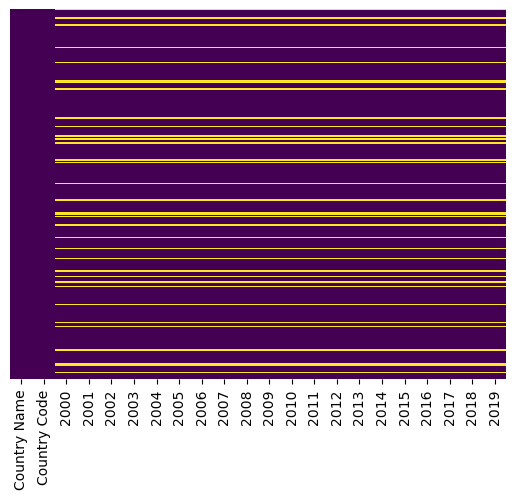

In [17]:
# Plotting the null values using heatmap
plt.figure()
sns.heatmap(suicide_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [18]:
# Analysing the null values of temperature dataset
temp_df.isnull().sum()

Country Code     0
F2000           16
F2001           17
F2002           13
F2003           11
F2004           12
F2005           13
F2006           10
F2007            8
F2008           13
F2009           13
F2010           10
F2011            8
F2012           10
F2013            9
F2014            9
F2015            9
F2016           12
F2017           11
F2018           12
F2019           12
dtype: int64

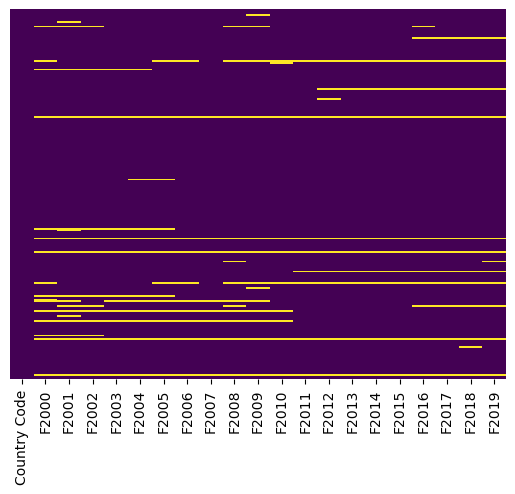

In [19]:
# Plotting the null values using heatmap
plt.figure()
sns.heatmap(temp_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Replacing Null values**

From the analysis it is found that suicide dataset has missing datas for same countries, whereas, for the temperature dataset it has got for different countries. Hence, for the temperature dataset we can replace it by mean values to avoid some null values.

In [20]:
# Replacing the null values by the mean value from previous years for a country row
temp_df = temp_df.T.fillna(temp_df.mean(axis=1)).T # Using transpose inorder to find the mean row-wise (by default the mean function is done column-wise)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\983787512.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_df = temp_df.T.fillna(temp_df.mean(axis=1)).T # Using transpose inorder to find the mean row-wise (by default the mean function is done column-wise)


In [21]:
# Checking the number of null values after replacing
temp_df.isnull().sum()

Country Code    0
F2000           5
F2001           5
F2002           5
F2003           5
F2004           5
F2005           5
F2006           5
F2007           5
F2008           5
F2009           5
F2010           5
F2011           5
F2012           5
F2013           5
F2014           5
F2015           5
F2016           5
F2017           5
F2018           5
F2019           5
dtype: int64

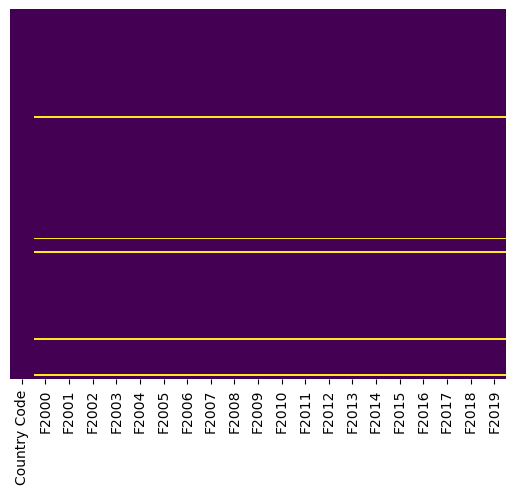

In [22]:
# Plotting the null values using heatmap
plt.figure()
sns.heatmap(temp_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Dropping the Null values**

In [23]:
# Merging the suicide and temperature datasets on country code inorder to drop all the countries without values.
merge_df = suicide_df.merge(temp_df, on='Country Code')

In [24]:
# Analysing the null values for the merged data
merge_df.isnull().sum()

Country Name     0
Country Code     0
2000            26
2001            26
2002            26
2003            26
2004            26
2005            26
2006            26
2007            26
2008            26
2009            26
2010            26
2011            26
2012            26
2013            26
2014            26
2015            26
2016            26
2017            26
2018            26
2019            26
F2000            2
F2001            2
F2002            2
F2003            2
F2004            2
F2005            2
F2006            2
F2007            2
F2008            2
F2009            2
F2010            2
F2011            2
F2012            2
F2013            2
F2014            2
F2015            2
F2016            2
F2017            2
F2018            2
F2019            2
dtype: int64

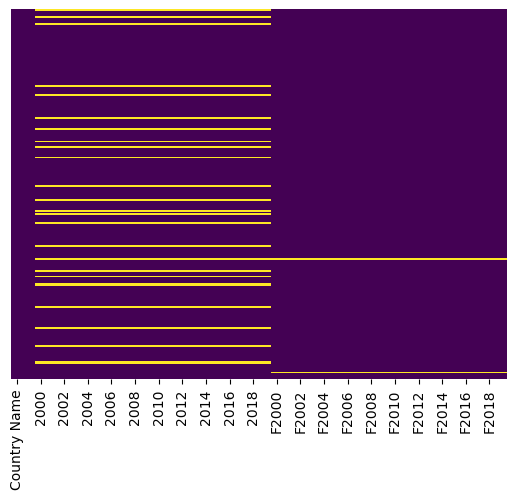

In [25]:
# Plotting the null values using heatmap
plt.figure()
sns.heatmap(merge_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [26]:
# Dropping rows with null values
merge_df.dropna(inplace = True)

In [27]:
# Analysing the null values after cleaning them
merge_df.isnull().sum()

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
F2000           0
F2001           0
F2002           0
F2003           0
F2004           0
F2005           0
F2006           0
F2007           0
F2008           0
F2009           0
F2010           0
F2011           0
F2012           0
F2013           0
F2014           0
F2015           0
F2016           0
F2017           0
F2018           0
F2019           0
dtype: int64

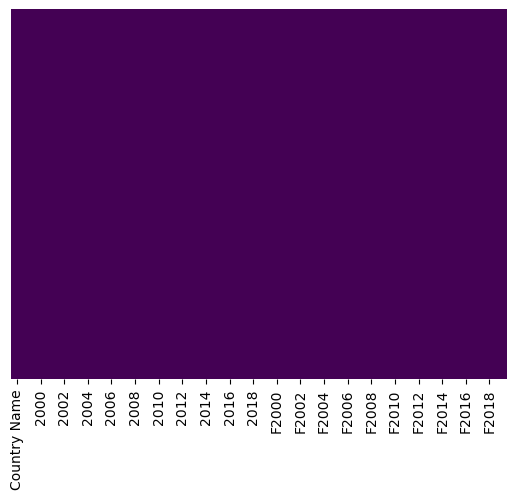

In [28]:
# Plotting the null values using heatmap
plt.figure()
sns.heatmap(merge_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [29]:
# Analysing the details of merged df 
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 207
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  181 non-null    object 
 1   Country Code  181 non-null    object 
 2   2000          181 non-null    float64
 3   2001          181 non-null    float64
 4   2002          181 non-null    float64
 5   2003          181 non-null    float64
 6   2004          181 non-null    float64
 7   2005          181 non-null    float64
 8   2006          181 non-null    float64
 9   2007          181 non-null    float64
 10  2008          181 non-null    float64
 11  2009          181 non-null    float64
 12  2010          181 non-null    float64
 13  2011          181 non-null    float64
 14  2012          181 non-null    float64
 15  2013          181 non-null    float64
 16  2014          181 non-null    float64
 17  2015          181 non-null    float64
 18  2016          181 non-null    

The cleaned data now contains 181 countries, this is used for further analysis.

### **1.4 Analysis**

Analysis of the above cleaned data is done under three different steps:
> 1. Statistical analysis
> 2. Correlation analysis
> 3. Geospatial analysis

#### **1.4.1 Statistical analysis**

This study analyses the dataset using different measures of dispersion such as mean, median and standard deviation.

In [30]:
merge_df[['F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019']] = merge_df[['F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019']].astype(float)

In [31]:
# Cleaned data is now filtered to different datasets suicide and temperature again to make analysis easier
# suicide df
suicide_df = merge_df[['Country Name', 'Country Code', '2000', '2001', '2002', '2003', 
                       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
                       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]

# temperature df
temp_df = merge_df[['Country Code', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019']]

# Change the name of columns to be consistent
temp_df = temp_df.set_axis(['Country Code', '2000', '2001', '2002', '2003', 
                       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
                       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)


In [32]:
suicide_df.to_csv('Suicide_clean.csv', index = False)

##### **1.4.1.1 Mean**

##### Country-wise

In [33]:
# Finding the mean of suicide rates for each country throughout the year 2000 to 2019
suicide_df['Suicide Mean (Country)'] = suicide_df.iloc[:,2:22].mean(axis = 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\2862490628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicide_df['Suicide Mean (Country)'] = suicide_df.iloc[:,2:22].mean(axis = 1)


In [34]:
# The mean column is stored in a seperate dataframe
suicide_mean_country_df = suicide_df[['Suicide Mean (Country)']]

In [35]:
# stanalysis_country_df with all the statistical values is formed for easy analysis
stanalysis_country_df = merge_df[['Country Code']]
stanalysis_country_df = stanalysis_country_df.join(suicide_mean_country_df)

In [36]:
# Analysing the dataframe
stanalysis_country_df.head()

Country Code  Suicide Mean (Country)
1          AFG                   4.460
2          AGO                   7.310
3          ALB                   5.875
5          ARE                   7.570
6          ARG                   8.890

In [37]:
# Finding the mean of temperature changes for each country throughout the year 2000 to 2019
temp_df['Temperature Mean (Country)'] = temp_df.iloc[:,1:21].mean(axis = 1)

In [38]:
# The mean column is stored in a seperate dataframe
temp_mean_country_df = temp_df[['Temperature Mean (Country)']]

In [39]:
# This is again joined to the stanalysis dataframe
stanalysis_country_df = stanalysis_country_df.join(temp_mean_country_df)

In [40]:
# Analysing the df
stanalysis_country_df.head()

Country Code  Suicide Mean (Country)  Temperature Mean (Country)
1          AFG                   4.460                     1.08180
2          AGO                   7.310                     0.88165
3          ALB                   5.875                     1.11810
5          ARE                   7.570                     1.06045
6          ARG                   8.890                     0.53390

##### Year-wise

In [41]:
# Finding the mean of suicide rates for each year throughout the year 2000 to 2019
stanalysis_year_df = pd.DataFrame()
stanalysis_year_df['Suicide Mean (Year)'] = suicide_df.iloc[:,2:22].mean()

In [42]:
# Analysing the stanalysis_year_df
stanalysis_year_df.head()

Suicide Mean (Year)
2000            11.633382
2001            11.440473
2002            11.390467
2003            11.239843
2004            11.141746

In [43]:
# Finding the mean of suicide rates for each year throughout the year 2000 to 2019
stanalysis_year_df['Temperature Mean (Year)'] = temp_df.iloc[:,1:22].mean()

In [44]:
# Analysing the stanalysis_year_df
stanalysis_year_df.head()

Suicide Mean (Year)  Temperature Mean (Year)
2000            11.633382                 0.718758
2001            11.440473                 0.873913
2002            11.390467                 0.958189
2003            11.239843                 0.838335
2004            11.141746                 0.818465

##### **1.4.1.2 Median**

##### Country-wise

In [45]:
# Finding the median of suicide rates for each country throughout the year 2000 to 2019
suicide_df['Suicide Median (Country)'] = suicide_df.iloc[:,2:22].median(axis = 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\3966311466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicide_df['Suicide Median (Country)'] = suicide_df.iloc[:,2:22].median(axis = 1)


In [46]:
# The median column is stored in a seperate dataframe
suicide_median_country_df = suicide_df[['Suicide Median (Country)']]

In [47]:
# stanalysis_country_df is formed for easy analysis
stanalysis_country_df = stanalysis_country_df.join(suicide_median_country_df)

In [48]:
# Analysing the stanalysis dataframe
stanalysis_country_df.head()

Country Code  Suicide Mean (Country)  Temperature Mean (Country)  \
1          AFG                   4.460                     1.08180   
2          AGO                   7.310                     0.88165   
3          ALB                   5.875                     1.11810   
5          ARE                   7.570                     1.06045   
6          ARG                   8.890                     0.53390   

   Suicide Median (Country)  
1                      4.35  
2                      6.95  
3                      4.95  
5                      7.90  
6                      8.65

In [49]:
# Finding the median of temperature changes for each country throughout the year 2000 to 2019
temp_median_country_df = pd.DataFrame() # Median is stored in a new data frame
temp_median_country_df['Temperature Median (Country)'] = temp_df.iloc[:,1:21].median(axis = 1)

In [50]:
# This is again joined to the stanalysis dataframe
stanalysis_country_df = stanalysis_country_df.join(temp_median_country_df)

In [51]:
# Analysing the stanalysis_country_df
stanalysis_country_df.head()

Country Code  Suicide Mean (Country)  Temperature Mean (Country)  \
1          AFG                   4.460                     1.08180   
2          AGO                   7.310                     0.88165   
3          ALB                   5.875                     1.11810   
5          ARE                   7.570                     1.06045   
6          ARG                   8.890                     0.53390   

   Suicide Median (Country)  Temperature Median (Country)  
1                      4.35                        1.1870  
2                      6.95                        0.8750  
3                      4.95                        1.1560  
5                      7.90                        1.0555  
6                      8.65                        0.5420

##### Year-wise

In [52]:
# Finding the median of suicide rates for each year throughout the year 2000 to 2019
stanalysis_year_df['Suicide Median (Year)'] = suicide_df.iloc[:,2:22].median()

In [53]:
# Analysing the stanalysis_year_df
stanalysis_year_df.head()

Suicide Mean (Year)  Temperature Mean (Year)  Suicide Median (Year)
2000            11.633382                 0.718758                    9.0
2001            11.440473                 0.873913                    8.9
2002            11.390467                 0.958189                    8.9
2003            11.239843                 0.838335                    8.8
2004            11.141746                 0.818465                    8.8

In [54]:
# Finding the median of suicide rates for each year throughout the year 2000 to 2019
stanalysis_year_df['Temperature Median (Year)'] = temp_df.iloc[:,1:21].median()

In [55]:
# Analysing the stanalysis_year_df
stanalysis_year_df.head()

Suicide Mean (Year)  Temperature Mean (Year)  Suicide Median (Year)  \
2000            11.633382                 0.718758                    9.0   
2001            11.440473                 0.873913                    8.9   
2002            11.390467                 0.958189                    8.9   
2003            11.239843                 0.838335                    8.8   
2004            11.141746                 0.818465                    8.8   

      Temperature Median (Year)  
2000                      0.594  
2001                      0.734  
2002                      0.856  
2003                      0.864  
2004                      0.779

##### **1.4.1.3 Standard deviation**

##### Country-wise

In [56]:
# Finding the standard deviation of suicide rates for each country throughout the year 2000 to 2019
suicide_df['Suicide SD (Country)'] = np.std(suicide_df.iloc[:,2:22], axis = 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\1140336740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicide_df['Suicide SD (Country)'] = np.std(suicide_df.iloc[:,2:22], axis = 1)


In [57]:
# The standard deviation column is stored in a seperate dataframe
suicide_sd_country_df = suicide_df[['Suicide SD (Country)']]

In [58]:
# stanalysis_country_df with all the statistical values is formed for easy analysis
stanalysis_country_df = stanalysis_country_df.join(suicide_sd_country_df)

In [59]:
# Analysing the stanalysis_country_df
stanalysis_country_df

Country Code  Suicide Mean (Country)  Temperature Mean (Country)  \
1            AFG                4.460000                     1.08180   
2            AGO                7.310000                     0.88165   
3            ALB                5.875000                     1.11810   
5            ARE                7.570000                     1.06045   
6            ARG                8.890000                     0.53390   
..           ...                     ...                         ...   
202          WLD               10.818837                     1.10435   
203          WSM               12.795000                     0.89400   
205          ZAF               24.240000                     0.82885   
206          ZMB               10.200000                     0.74050   
207          ZWE               16.570000                     0.32195   

     Suicide Median (Country)  Temperature Median (Country)  \
1                    4.350000                        1.1870   
2                    6.950000                        0.8750   
3                    4.950000                        1.1560   
5                    7.900000                        1.0555   
6                    8.650000                        0.5420   
..                        ...                           ...   
202                 10.871498                        1.0370   
203                 12.800000                        0.9020   
205                 24.350000                        0.7560   
206                  9.950000                        0.7850   
207                 15.900000                        0.1795   

     Suicide SD (Country)  
1                0.429418  
2                1.009901  
3                1.517852  
5                0.950842  
6                0.583009  
..                    ...  
202              1.193404  
203              0.550886  
205              1.132872  
206              1.639207  
207              3.024913  

[181 rows x 6 columns]

In [60]:
# Finding the standard deviation of temperature changes for each country throughout the year 2000 to 2019
temp_sd_country_df = pd.DataFrame() # Standard deviation is stored in a new data frame
temp_sd_country_df['Temperature SD (Country)'] = np.std(temp_df.iloc[:,1:21], axis = 1)

In [61]:
# This is again joined to the stanalysis_country_df
stanalysis_country_df = stanalysis_country_df.join(temp_sd_country_df)

In [62]:
# Analysing the stanalysis_country_df
stanalysis_country_df.head()

Country Code  Suicide Mean (Country)  Temperature Mean (Country)  \
1          AFG                   4.460                     1.08180   
2          AGO                   7.310                     0.88165   
3          ALB                   5.875                     1.11810   
5          ARE                   7.570                     1.06045   
6          ARG                   8.890                     0.53390   

   Suicide Median (Country)  Temperature Median (Country)  \
1                      4.35                        1.1870   
2                      6.95                        0.8750   
3                      4.95                        1.1560   
5                      7.90                        1.0555   
6                      8.65                        0.5420   

   Suicide SD (Country)  Temperature SD (Country)  
1              0.429418                  0.442247  
2              1.009901                  0.410924  
3              1.517852                  0.461761  
5              0.950842                  0.301300  
6              0.583009                  0.344915

##### Year-wise

In [63]:
# Finding the standard deviation of suicide rates for each year throughout the year 2000 to 2019
stanalysis_year_df['Suicide SD (Year)'] = np.std(suicide_df.iloc[:,2:22])

In [64]:
# Analysing the stanalysis_year_df
stanalysis_year_df.head()

Suicide Mean (Year)  Temperature Mean (Year)  Suicide Median (Year)  \
2000            11.633382                 0.718758                    9.0   
2001            11.440473                 0.873913                    8.9   
2002            11.390467                 0.958189                    8.9   
2003            11.239843                 0.838335                    8.8   
2004            11.141746                 0.818465                    8.8   

      Temperature Median (Year)  Suicide SD (Year)  
2000                      0.594           9.317230  
2001                      0.734           9.157126  
2002                      0.856           9.151304  
2003                      0.864           9.073108  
2004                      0.779           8.957770

In [65]:
# Finding the standard deviation of suicide rates for each year throughout the year 2000 to 2019
stanalysis_year_df['Temperature SD (Year)'] = np.std(temp_df.iloc[:,1:21])

All the statistical analysis values is now stored into two different dataframes, one representing the year and the other for the temperature

In [66]:
# Analysing the stanalysis_year_df
stanalysis_year_df.head()

Suicide Mean (Year)  Temperature Mean (Year)  Suicide Median (Year)  \
2000            11.633382                 0.718758                    9.0   
2001            11.440473                 0.873913                    8.9   
2002            11.390467                 0.958189                    8.9   
2003            11.239843                 0.838335                    8.8   
2004            11.141746                 0.818465                    8.8   

      Temperature Median (Year)  Suicide SD (Year)  Temperature SD (Year)  
2000                      0.594           9.317230               0.543814  
2001                      0.734           9.157126               0.477020  
2002                      0.856           9.151304               0.386567  
2003                      0.864           9.073108               0.403140  
2004                      0.779           8.957770               0.366896

#### **1.4.2 Correlation analysis**

**1.4.2.1 Before geometry column inclusion**

Country-wise

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\2335656952.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stanalysis_country_corr = stanalysis_country_df.corr()


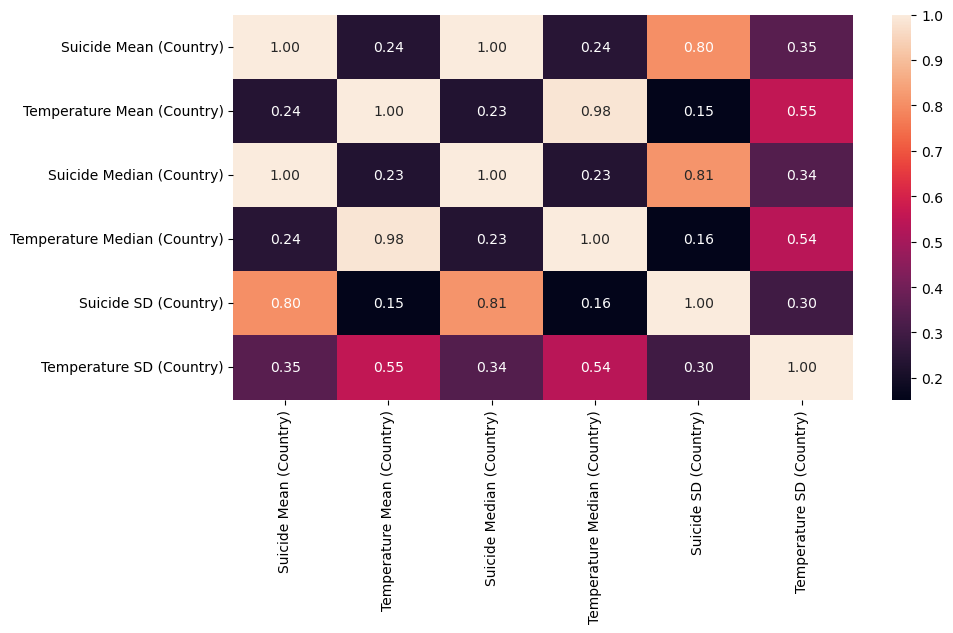

In [67]:
# Correlation of stanalysis_country_df is found to understand the value with highest correlation
stanalysis_country_corr = stanalysis_country_df.corr()

# plot the heatmap
plt.figure(figsize=(10,5)) # Size of the heatmap
sns.heatmap(stanalysis_country_corr,
            annot=True, 
            annot_kws={'size': 10},# Size of the annotation
            fmt='.2f', # Values are rounded to 2 digits after the decimal
        xticklabels = stanalysis_country_corr.columns, # x and y coordinates labels are set as the column names
        yticklabels = stanalysis_country_corr.columns)

plt.show()

**Inference:** It is clear from the heatmap that standard deviation values has the highest correlation of 0.30.

Year-wise

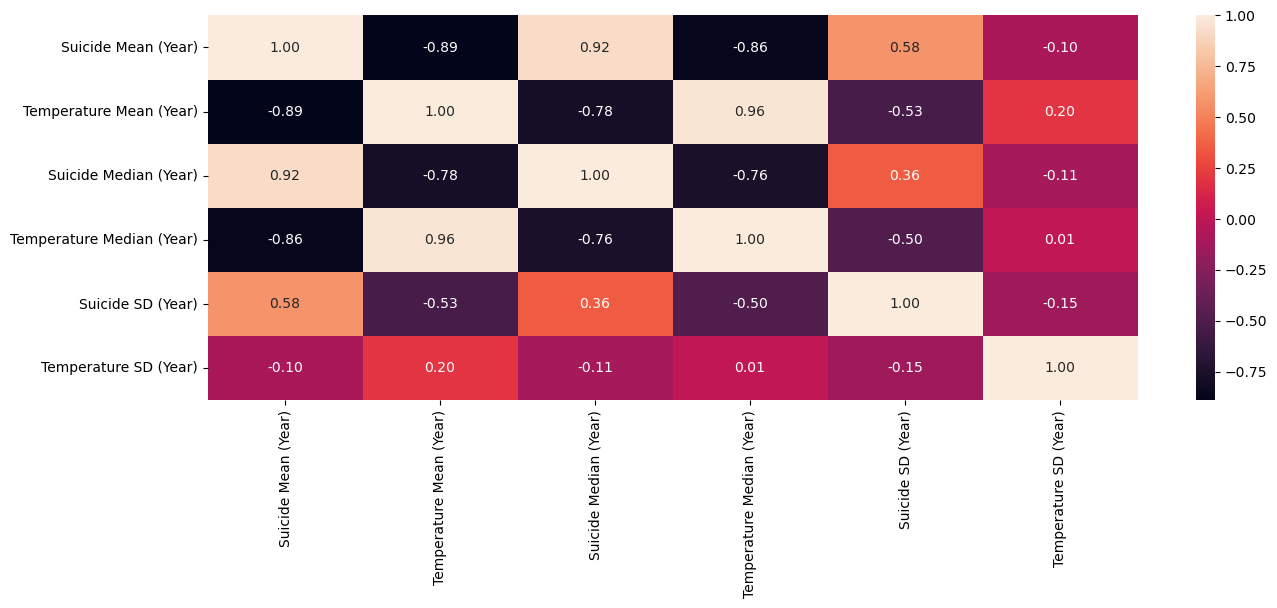

In [68]:
# Correlation of stanalysis_country_df is found to understand the value with highest correlation
stanalysis_year_corr = stanalysis_year_df.corr()

# plot the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(stanalysis_year_corr,
            annot=True,
            annot_kws={'size': 10}, # Size of the annotation
            fmt='.2f', # Values are rounded to 2 digits after the decimal
        xticklabels = stanalysis_year_corr.columns, # x and y coordinates labels are set as the column names
        yticklabels = stanalysis_year_corr.columns)

plt.show()

**Inference:** Even for the yearly statistical analysis it is found that standard deviation has the highest correlation value of -0.15.

**1.4.2.2 Geometry column inclusion**

In [69]:
# Read the gdp file naturalearth_lowres to get the geometry
gpd.datasets.available
geometry_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Using geopandas to read file since the dataset contains geometry
geometry_gdf.head() # Analyse the geo dataset by reading first five rows

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\2216827798.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geometry_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Using geopandas to read file since the dataset contains geometry


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [70]:
# Filtering the required columns
geometry_gdf = geometry_gdf[['iso_a3','geometry']] # We use the iso_a3 column to be a criteria for merging
geometry_gdf.head() # Reading the geometry dataset to analyse the dataset

iso_a3                                           geometry
0    FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1    TZA  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2    ESH  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    CAN  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    USA  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [71]:
# Change the name of column iso_a3 to Country Code
geometry_gdf = geometry_gdf.set_axis(['Country Code', 'geometry'], axis=1)
geometry_gdf.info() # Analysing the dataset using the info method

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country Code  177 non-null    object  
 1   geometry      177 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 2.9+ KB


In [72]:
# Merging the stanalysis_country_df dataset with geometry to plot the geographical patterns
stanalysis_country_gdf = geometry_gdf.merge(stanalysis_country_df, on='Country Code')
stanalysis_country_gdf.head() # Analysing the data using head function

Country Code                                           geometry  \
0          FJI  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1          TZA  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2          CAN  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
3          USA  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
4          KAZ  POLYGON ((87.35997 49.21498, 86.59878 48.54918...   

   Suicide Mean (Country)  Temperature Mean (Country)  \
0                   9.645                     0.76395   
1                   5.360                     0.89450   
2                  12.010                     1.30820   
3                  13.220                     0.99075   
4                  30.695                     1.44285   

   Suicide Median (Country)  Temperature Median (Country)  \
0                      9.60                        0.7130   
1                      5.15                        0.8955   
2                     11.95                        1.2865   
3                     12.95                        0.9950   
4                     30.10                        1.5255   

   Suicide SD (Country)  Temperature SD (Country)  
0              0.404320                  0.205019  
1              1.294372                  0.258789  
2              0.478435                  0.684558  
3              1.513142                  0.449683  
4              7.603320                  0.557020

**Note:** The dataset is been converted to geodataframe upon adding the geometry column. And als it should be noted that only country wise analysis can include the geometry column in the dataframe

In [73]:
# Analysing the data standard deviation
stanalysis_country_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Country Code                  162 non-null    object  
 1   geometry                      162 non-null    geometry
 2   Suicide Mean (Country)        162 non-null    float64 
 3   Temperature Mean (Country)    162 non-null    float64 
 4   Suicide Median (Country)      162 non-null    float64 
 5   Temperature Median (Country)  162 non-null    float64 
 6   Suicide SD (Country)          162 non-null    float64 
 7   Temperature SD (Country)      162 non-null    float64 
dtypes: float64(6), geometry(1), object(1)
memory usage: 11.4+ KB


After including the geometry column we know got only 162 countries to analyse further.

**1.4.2.3 Correlation analysis after geometry inclusion**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\455294731.py:2: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stanalysis_country_corr_gdf = stanalysis_country_gdf.corr()


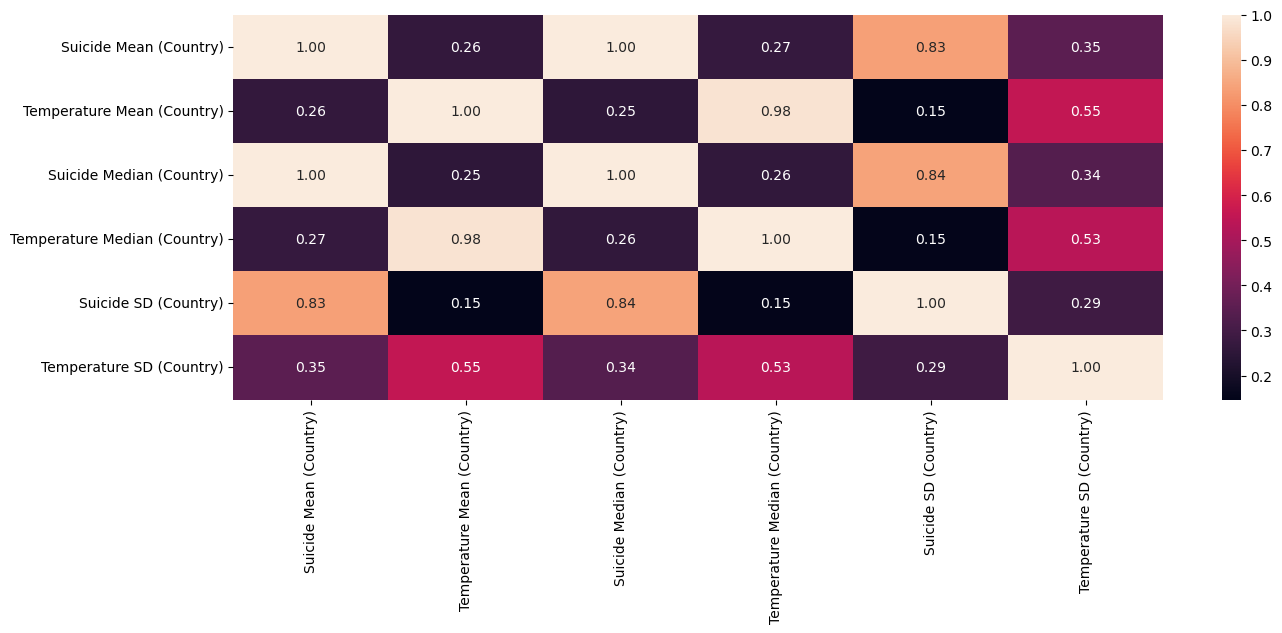

In [74]:
# After adding geometry column we find correlation of the geodataframe
stanalysis_country_corr_gdf = stanalysis_country_gdf.corr()

# plot the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(stanalysis_country_corr_gdf,
            annot=True,
            annot_kws={'size': 10}, # Size of the annotation
            fmt='.2f', # Values are rounded to 2 digits after the decimal
        xticklabels = stanalysis_country_corr_gdf.columns, # x and y coordinates labels are set as the column names
        yticklabels = stanalysis_country_corr_gdf.columns)

plt.show()

In [75]:
corr = merge_df.corr() # Finding correlation among all the years for all the countries between the temperature and suicide dataset
corr = corr[['F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019']] # Filtering the temperature years as columns
corr.drop(['F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019'], inplace = True) # Filtering the suicide data years as rows

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\2898106349.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge_df.corr() # Finding correlation among all the years for all the countries between the temperature and suicide dataset


In [76]:
# Analysing the corr
corr

F2000     F2001     F2002     F2003     F2004     F2005     F2006  \
2000  0.381808  0.241264  0.344687 -0.151231  0.169084  0.254107 -0.172271   
2001  0.383174  0.248559  0.347048 -0.153199  0.175533  0.266960 -0.161538   
2002  0.371080  0.254155  0.340355 -0.154961  0.176795  0.263843 -0.164572   
2003  0.355273  0.241797  0.331204 -0.147221  0.183529  0.259727 -0.171228   
2004  0.340030  0.232053  0.323033 -0.154918  0.181277  0.257983 -0.177443   
2005  0.321288  0.219637  0.309844 -0.156103  0.169545  0.250675 -0.190963   
2006  0.304425  0.205747  0.286965 -0.146733  0.167052  0.241184 -0.196750   
2007  0.258962  0.176398  0.245127 -0.143805  0.159765  0.224866 -0.202744   
2008  0.249419  0.169755  0.226511 -0.149153  0.144802  0.217028 -0.205148   
2009  0.246783  0.161672  0.209816 -0.145464  0.138682  0.207398 -0.205138   
2010  0.231047  0.150185  0.201894 -0.145285  0.128960  0.192259 -0.208958   
2011  0.232400  0.146942  0.198993 -0.133374  0.129389  0.189412 -0.199013   
2012  0.222016  0.145597  0.177822 -0.125038  0.116404  0.173615 -0.193969   
2013  0.210687  0.134158  0.168605 -0.113501  0.116531  0.173076 -0.183332   
2014  0.197685  0.127506  0.152601 -0.104802  0.113991  0.160336 -0.182046   
2015  0.185948  0.116832  0.142298 -0.096365  0.105704  0.150363 -0.185049   
2016  0.184375  0.115576  0.140334 -0.106630  0.108169  0.155309 -0.185315   
2017  0.184862  0.110511  0.127166 -0.112986  0.087609  0.146520 -0.174552   
2018  0.185570  0.112564  0.126589 -0.095676  0.096461  0.153204 -0.187500   
2019  0.183494  0.113269  0.119718 -0.088941  0.093390  0.149419 -0.184971   

         F2007     F2008     F2009     F2010     F2011     F2012     F2013  \
2000  0.516378  0.455849  0.259633 -0.278944  0.079240  0.301652  0.025616   
2001  0.520574  0.461850  0.261044 -0.277135  0.087672  0.300499  0.026417   
2002  0.508363  0.450399  0.252850 -0.267938  0.085926  0.293693  0.011797   
2003  0.504911  0.436657  0.241506 -0.266258  0.080223  0.279164  0.007274   
2004  0.493525  0.423953  0.225747 -0.266042  0.069355  0.272566  0.003954   
2005  0.474477  0.401741  0.204477 -0.259549  0.058660  0.257556 -0.004039   
2006  0.462399  0.380439  0.190161 -0.262635  0.048495  0.243626 -0.011891   
2007  0.415446  0.336228  0.148350 -0.249964  0.033514  0.207013 -0.035986   
2008  0.399660  0.327957  0.134359 -0.248908  0.020619  0.198620 -0.046990   
2009  0.385382  0.320244  0.133624 -0.261851  0.013818  0.191862 -0.068699   
2010  0.368834  0.297924  0.118936 -0.249260  0.002635  0.182271 -0.070640   
2011  0.358766  0.291069  0.113155 -0.264217  0.003655  0.173332 -0.083900   
2012  0.340818  0.271621  0.103204 -0.250079 -0.000602  0.173643 -0.074155   
2013  0.320661  0.250344  0.092723 -0.242341 -0.006344  0.158826 -0.073752   
2014  0.303811  0.233402  0.085396 -0.236809 -0.013937  0.153774 -0.072897   
2015  0.286614  0.213641  0.070315 -0.243112 -0.024299  0.142905 -0.080311   
2016  0.281142  0.213730  0.071895 -0.250316 -0.027577  0.141938 -0.084233   
2017  0.277350  0.214401  0.078424 -0.271799 -0.015355  0.136147 -0.099202   
2018  0.279233  0.207299  0.087010 -0.272298 -0.023922  0.146520 -0.094483   
2019  0.276288  0.202694  0.090455 -0.273702 -0.023446  0.146451 -0.100604   

         F2014     F2015     F2016     F2017     F2018     F2019  
2000  0.345254  0.386410  0.374718  0.143082  0.257526  0.422403  
2001  0.347738  0.389974  0.383788  0.149311  0.260341  0.423120  
2002  0.340011  0.386004  0.373690  0.154327  0.255969  0.423657  
2003  0.325947  0.374074  0.379930  0.152101  0.242334  0.417036  
2004  0.314765  0.373293  0.370796  0.144820  0.230866  0.406885  
2005  0.294916  0.355841  0.360919  0.132033  0.215767  0.395475  
2006  0.285640  0.346247  0.353867  0.121395  0.211193  0.383016  
2007  0.249167  0.310116  0.319943  0.107709  0.175069  0.343330  
2008  0.251872  0.302863  0.323000  0.096912  0.176158  0.341477  
2009  0.260260  0.298170  0.317042  0.090892  0.173816  0.333

#### **1.4.3 Regression Analysis**

In [77]:
reg_df = temp_df.merge(stanalysis_country_df, on = 'Country Code')
# stanalysis_country_df['Suicide SD (Country)']
reg_df.drop(columns = ['Temperature Mean (Country)_x', 'Suicide Mean (Country)',
       'Temperature Mean (Country)_y', 'Suicide Median (Country)',
       'Temperature Median (Country)','Temperature SD (Country)'], inplace = True)

In [78]:
reg_df.to_csv('Regression df.csv', index = True)

In [79]:
reg_df.columns

Index(['Country Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', 'Suicide SD (Country)'],
      dtype='object')

In [80]:
input = reg_df[['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019']] # x variable
output = reg_df['Suicide SD (Country)'] # y variable

In [81]:
input_train, input_test, output_train, output_test = train_test_split(input, output,test_size=0.3, random_state = 37)

In [82]:
input_test.count()

2000    55
2001    55
2002    55
2003    55
2004    55
2005    55
2006    55
2007    55
2008    55
2009    55
2010    55
2011    55
2012    55
2013    55
2014    55
2015    55
2016    55
2017    55
2018    55
2019    55
dtype: int64

In [83]:
mult_linearreg = linear_model.LinearRegression()
mult_linearreg.fit(input_train, output_train)
mult_linearreg.coef_

array([-0.15401776, -0.42131993, -0.6098995 , -0.93040222,  2.1627597 ,
        0.31786135, -2.54910689,  0.95146149, -0.98630051, -1.65115338,
        0.4056408 ,  0.70005283, -0.37478585, -0.1592286 ,  1.47095498,
        2.16799084,  2.28067337, -0.3511053 , -1.13729728, -0.10931365])

In [84]:
mult_linearreg.intercept_

-1.3624749827574416

In [85]:
mult_output_predict = mult_linearreg.predict(mult_linearreg.coef_*input_test + mult_linearreg.intercept_)
# mult_linearreg.predict([[7]])
# input_test

In [86]:
print("Residual sum of squares (MSE):" , np.mean((output_test-mult_output_predict)**2))
print("Mean absolute error:", np.mean(np.absolute(output_test-mult_output_predict)))
print("R2-score:", r2_score(output_test,mult_output_predict))

Residual sum of squares (MSE): 867.5864522094637
Mean absolute error: 28.131160723933633
R2-score: -302.2613246382332


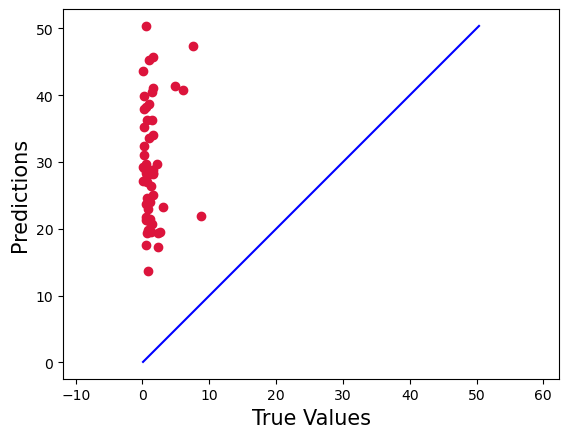

In [87]:
plt.scatter(output_test, mult_output_predict, c='crimson')
max = max(max(mult_output_predict), max(output_test))
min = min(min(mult_output_predict), min(output_test))
plt.plot([max, min], [max, min], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [88]:
model = sm.OLS(output_train, input_train).fit()

In [89]:
ols_output_predict = model.predict(input_test)
# ols_output_test

In [90]:
print("Residual sum of squares (MSE):" , np.mean((output_test - ols_output_predict) **2))
print("Mean absolute error:", np.mean(np.absolute(output_test - ols_output_predict)))
print("R2-score:", r2_score(output_test, ols_output_predict))

Residual sum of squares (MSE): 2.462790216234684
Mean absolute error: 1.2118077473400213
R2-score: 0.1391416712658713


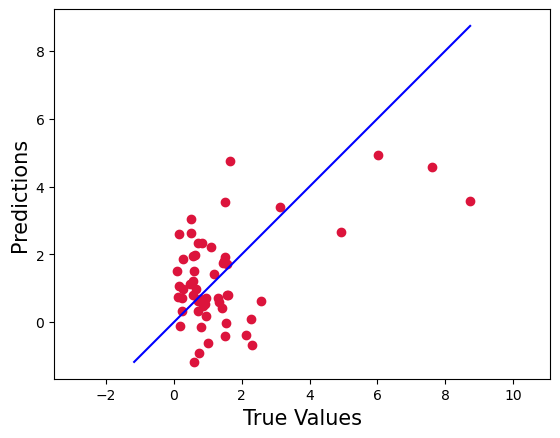

In [130]:
# plt.figure(figsize=(10,10))
plt.scatter(output_test, ols_output_predict, c='crimson')
p1 = max(max(ols_output_predict), max(output_test))
p2 = min(min(ols_output_predict), min(output_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### **1.4.4 Predictive analytics**

In [92]:
suicide_pred_df = pd.read_csv('Suicide_prediction.csv')
temp_pred_df = pd.read_csv('Temp_prediction.csv')

In [93]:
temp_pred_df = temp_pred_df.set_axis(['Country Code', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022', 'F2023', 'F2024', 'F2025', 'F2026', 
                            'F2027', 'F2028', 'F2029', 'F2030'], axis=1)

In [94]:
# Merging the suicide and temperature datasets on country code inorder to drop all the countries without values.
merge_pred_df = suicide_pred_df.merge(temp_pred_df, on='Country Code')

In [95]:
merge_pred_df.columns

Index(['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', 'F2000',
       'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008',
       'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016',
       'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022', 'F2023', 'F2024',
       'F2025', 'F2026', 'F2027', 'F2028', 'F2029', 'F2030'],
      dtype='object')

In [96]:
corr_pred = merge_pred_df.corr() # Finding correlation among all the years for all the countries between the temperature and suicide dataset
corr_pred = corr_pred[['F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022', 'F2023', 'F2024',
       'F2025', 'F2026', 'F2027', 'F2028', 'F2029', 'F2030']] # Filtering the temperature years as columns
corr_pred.drop(['F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022', 'F2023', 'F2024',
       'F2025', 'F2026', 'F2027', 'F2028', 'F2029', 'F2030'], inplace = True) # Filtering the suicide data years as rows

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\888963785.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pred = merge_pred_df.corr() # Finding correlation among all the years for all the countries between the temperature and suicide dataset


In [97]:
corr_pred

F2000     F2001     F2002     F2003     F2004     F2005     F2006  \
2000  0.381545  0.241228  0.344404 -0.151865  0.168835  0.255021 -0.172858   
2001  0.382968  0.248583  0.346740 -0.153767  0.175352  0.267875 -0.162202   
2002  0.370870  0.254204  0.340046 -0.155450  0.176721  0.264652 -0.165128   
2003  0.355068  0.241796  0.330952 -0.147564  0.183616  0.260445 -0.171772   
2004  0.339810  0.232066  0.322792 -0.155211  0.181346  0.258605 -0.177951   
2005  0.321080  0.219615  0.309699 -0.156329  0.169624  0.251262 -0.191418   
2006  0.304260  0.205755  0.286814 -0.146804  0.167187  0.241723 -0.197165   
2007  0.258844  0.176406  0.244902 -0.143805  0.160003  0.225384 -0.203074   
2008  0.249373  0.169670  0.226287 -0.149028  0.145056  0.217634 -0.205430   
2009  0.246769  0.161577  0.209552 -0.145288  0.138937  0.208035 -0.205340   
2010  0.231074  0.150140  0.201649 -0.145066  0.129249  0.192860 -0.209168   
2011  0.232439  0.146827  0.198762 -0.133132  0.129715  0.190072 -0.199126   
2012  0.222124  0.145547  0.177539 -0.124708  0.116681  0.174175 -0.194147   
2013  0.210887  0.134018  0.168353 -0.113087  0.116786  0.173614 -0.183554   
2014  0.197915  0.127357  0.152288 -0.104416  0.114219  0.160832 -0.182263   
2015  0.186189  0.116697  0.142042 -0.095992  0.105946  0.150885 -0.185246   
2016  0.184579  0.115502  0.140061 -0.106298  0.108378  0.155810 -0.185543   
2017  0.185084  0.110575  0.126911 -0.112655  0.087770  0.147114 -0.174936   
2018  0.185779  0.112595  0.126264 -0.095350  0.096609  0.153734 -0.187797   
2019  0.183668  0.113364  0.119358 -0.088626  0.093556  0.149961 -0.185258   
2020  0.163157  0.096643  0.096246 -0.081711  0.082988  0.133160 -0.172269   
2021  0.144636  0.083171  0.076314 -0.069095  0.075833  0.120116 -0.167012   
2022  0.125125  0.070808  0.055187 -0.062218  0.064068  0.103690 -0.166009   
2023  0.109719  0.061183  0.039221 -0.055577  0.056234  0.094855 -0.160282   
2024  0.093432  0.048937  0.021415 -0.047762  0.048344  0.086267 -0.155084   
2025  0.079747  0.040422  0.006644 -0.041407  0.040946  0.077430 -0.149551   
2026  0.064455  0.029723 -0.009851 -0.032804  0.032597  0.065025 -0.144846   
2027  0.046804  0.019178 -0.027837 -0.026622  0.022599  0.050916 -0.143106   
2028  0.033736  0.011173 -0.039510 -0.015695  0.020345  0.044090 -0.134140   
2029  0.020407  0.001038 -0.053870 -0.009607  0.012706  0.034772 -0.130230   
2030  0.008387 -0.007115 -0.065780 -0.005309  0.005554  0.027042 -0.126281   

         F2007     F2008     F2009  ...     F2021     F2022     F2023  \
2000  0.516688  0.455857  0.259263  ...  0.399704  0.404511  0.378273   
2001  0.520877  0.461869  0.260566  ...  0.399102  0.408916  0.379142   
2002  0.508636  0.450458  0.252318  ...  0.393767  0.402575  0.374789   
2003  0.505156  0.436737  0.240999  ...  0.379757  0.389397  0.366478   
2004  0.493778  0.424034  0.225230  ...  0.368024  0.378790  0.358608   
2005  0.474722  0.401798  0.203849  ...  0.350369  0.358425  0.344079   
2006  0.462547  0.380530  0.189655  ...  0.332882  0.340113  0.330844   
2007  0.415492  0.336462  0.147771  ...  0.292038  0.302086  0.290098   
2008  0.399629  0.328256  0.133712  ...  0.298766  0.305316  0.293015   
2009  0.385417  0.320586  0.132955  ...  0.305119  0.307131  0.293224   
2010  0.368835  0.298282  0.118283  ...  0.289631  0.288022  0.281282   
2011  0.358742  0.291493  0.112634  ...  0.285906  0.283584  0.278017   
2012  0.340746  0.272118  0.102703  ...  0.277083  0.274882  0.268114   
2013  0.320569  0.250834  0.092342  ...  0.261252  0.258223  0.253425   
2014  0.303662  0.233943  0.085040  ...  0.251175  0.246178  0.242878   
2015  0.286475  0.214218  0.069924  ...  0.232800  0.225877  0.224791   
2016  0.281003  0.214271  0.071525  ...  0.226599  0.220892  0.216760   
2017  0.277218  0.214867  0.078139  ...  0.230132  0.224777  0.215238   
2018  0.279098  0.207830  0.086635  ...  0.220002  0.212113  0.208728   
2019  0.276191  0.203195  0.090049  ...  0.214692  0

In [98]:
corr_pred.to_csv('Pred correlation.csv', index=False)

#### **1.4.5 Spatial Analysis**

In [99]:
# Suicide_df and temp_df is added with geometry column inorder to do spatial analysis
# suicide_gdf = geometry_gdf.merge(suicide_df.iloc[:,:22], on='Country Code')
# temp_gdf = geometry_gdf.merge(temp_df.iloc[:,:21], on = 'Country Code')
merge_gdf = geometry_gdf.merge(merge_df.iloc[:,:42], on = 'Country Code')

In [100]:
merge_gdf.columns

Index(['Country Code', 'geometry', 'Country Name', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'F2000',
       'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008',
       'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016',
       'F2017', 'F2018', 'F2019'],
      dtype='object')

In [101]:
# Analysing the suicide geodataframe
merge_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country Code  162 non-null    object  
 1   geometry      162 non-null    geometry
 2   Country Name  162 non-null    object  
 3   2000          162 non-null    float64 
 4   2001          162 non-null    float64 
 5   2002          162 non-null    float64 
 6   2003          162 non-null    float64 
 7   2004          162 non-null    float64 
 8   2005          162 non-null    float64 
 9   2006          162 non-null    float64 
 10  2007          162 non-null    float64 
 11  2008          162 non-null    float64 
 12  2009          162 non-null    float64 
 13  2010          162 non-null    float64 
 14  2011          162 non-null    float64 
 15  2012          162 non-null    float64 
 16  2013          162 non-null    float64 
 17  2014          162 non-null    float64 
 18  20

In [102]:
#Finding the max and min values of all statistical variables inorder to plot the map
print('\nMean Values')
print('------------')
print('Maximum value of Suicide mean in the year:', stanalysis_year_df['Suicide Mean (Year)'].idxmax())
print('Maximum value of Temperature mean in the year:', stanalysis_year_df['Temperature Mean (Year)'].idxmax())
print('Minimum value of Suicide mean in the year:', stanalysis_year_df['Suicide Mean (Year)'].idxmin())
print('Minimum value of Temperature mean in the year:', stanalysis_year_df['Temperature Mean (Year)'].idxmin())

print('\nMedian Values')
print('------------')
print('Maximum value of Suicide median in the year:', stanalysis_year_df['Suicide Median (Year)'].idxmax())
print('Maximum value of Temperature median in the year:', stanalysis_year_df['Temperature Median (Year)'].idxmax())
print('Minimum value of Suicide median in the year:', stanalysis_year_df['Suicide Median (Year)'].idxmin())
print('Minimum value of Temperature median in the year:', stanalysis_year_df['Temperature Median (Year)'].idxmin())

print('\nSD Values')
print('------------')
print('Maximum value of Suicide SD in the year:', stanalysis_year_df['Suicide SD (Year)'].idxmax())
print('Maximum value of Temperature SD in the year:', stanalysis_year_df['Temperature SD (Year)'].idxmax())
print('Minimum value of Suicide SD in the year:', stanalysis_year_df['Suicide SD (Year)'].idxmin())
print('Minimum value of Temperature SD in the year:', stanalysis_year_df['Temperature SD (Year)'].idxmin())


Mean Values
------------
Maximum value of Suicide mean in the year: 2000
Maximum value of Temperature mean in the year: 2019
Minimum value of Suicide mean in the year: 2019
Minimum value of Temperature mean in the year: 2000

Median Values
------------
Maximum value of Suicide median in the year: 2000
Maximum value of Temperature median in the year: 2016
Minimum value of Suicide median in the year: 2019
Minimum value of Temperature median in the year: 2000

SD Values
------------
Maximum value of Suicide SD in the year: 2013
Maximum value of Temperature SD in the year: 2018
Minimum value of Suicide SD in the year: 2019
Minimum value of Temperature SD in the year: 2013


***Note:*** From all these values, there is an interesting finding which says for the minimum temperature there is maximum number of suicides. This is different when we look on the overall data.

**Choropleth map**

Plotting 2000 data, which has the Maximum values for Mean and Median for Suicide and temperature respectively.
And also minimum values for Mean and Median for Suicide and temperature respectively.

In [103]:
# Filtering 2000 year data
merge_gdf_2000 = merge_gdf[['Country Code', 'geometry', '2000', 'F2000']]

In [104]:
# Finding the min and max values for the specific year
print('Maximum Value of suicide in 2000\n--------------------------------\n\n', merge_gdf_2000.iloc[merge_gdf_2000['2000'].idxmax()],
     '\n\nMinimum Value of suicide in 2000\n--------------------------------\n', merge_gdf_2000.iloc[merge_gdf_2000['2000'].idxmin()])
print('\nMaximum Value of temperature in 2000\n------------------------------------\n', merge_gdf_2000.iloc[merge_gdf_2000['F2000'].idxmax()],
     '\nMinimum Value of temperature in 2000\n------------------------------------\n', merge_gdf_2000.iloc[merge_gdf_2000['F2000'].idxmin()])

Maximum Value of suicide in 2000
--------------------------------

 Country Code                                                  RUS
geometry        MULTIPOLYGON (((180.00000000000006 71.51571433...
2000                                                         53.8
F2000                                                       1.319
Name: 17, dtype: object 

Minimum Value of suicide in 2000
--------------------------------
 Country Code                                                  SYR
geometry        POLYGON ((35.71991824722275 32.709192409794866...
2000                                                          1.5
F2000                                                       0.668
Name: 101, dtype: object

Maximum Value of temperature in 2000
------------------------------------
 Country Code                                                  EST
geometry        POLYGON ((27.981126857000987 59.47537333432527...
2000                                                         29.1
F2000       

In [106]:
# Plot the map
merge_gdf_2000.explore(
    column="2000",  # Using column 2000 as plotting criteria
    popup=True,  # pop up the details on hover
    style_kwds=dict(color="black") # It gives black color to the borders
)

Plotting 2019 data, which has the Minimum values for Mean, Median and SD for Suicide data.
And also maximum value for Mean for temperature.

In [108]:
# Filtering 2019 year data
merge_gdf_2019 = merge_gdf[['Country Code', 'geometry', '2019', 'F2019']]

In [109]:
# Finding the min and max values for the specific year
print('Maximum Value of suicide in 2019\n--------------------------------\n', merge_gdf_2019.iloc[merge_gdf_2019['2019'].idxmax()],
     '\nMinimum Value of suicide in 2019\n--------------------------------\n', merge_gdf_2019.iloc[merge_gdf_2019['2019'].idxmin()])
print('\nMaximum Value of temperature in 2019\n------------------------------------\n', merge_gdf_2019.iloc[merge_gdf_2019['F2019'].idxmax()],
     '\nMinimum Value of temperature in 2019\n------------------------------------\n', merge_gdf_2019.iloc[merge_gdf_2019['F2019'].idxmin()])

Maximum Value of suicide in 2019
--------------------------------
 Country Code                                                  LSO
geometry        POLYGON ((28.978262566857243 -28.9555966122617...
2019                                                         72.4
F2019                                                       1.668
Name: 22, dtype: object 
Minimum Value of suicide in 2019
--------------------------------
 Country Code                                                  JOR
geometry        POLYGON ((35.54566531753454 32.393992011030576...
2019                                                          1.6
F2019                                                       1.281
Name: 76, dtype: object

Maximum Value of temperature in 2019
------------------------------------
 Country Code                                                  BLR
geometry        POLYGON ((28.17670942557794 56.16912995057879,...
2019                                                         21.2
F2019          

In [110]:
merge_gdf_2019.explore(
    column="2019",  # Using column 2019 as plotting criteria
    popup=True,  # pop up the details on hover
    style_kwds=dict(color="black") # It gives black color to the borders
)

Plotting 2016 data, which has the maximum value for temperature Median.

In [111]:
# Filtering 2016 year data
merge_gdf_2016 = merge_gdf[['Country Code', 'geometry', '2016', 'F2016']]

In [112]:
# Finding the min and max values for the specific year
print('Maximum Value of suicide in 2016\n--------------------------------\n', merge_gdf_2016.iloc[merge_gdf_2016['2016'].idxmax()],
     '\nMinimum Value of suicide in 2016\n--------------------------------\n', merge_gdf_2016.iloc[merge_gdf_2016['2016'].idxmin()])
print('\nMaximum Value of temperature in 2016\n------------------------------------\n', merge_gdf_2016.iloc[merge_gdf_2016['F2016'].idxmax()],
     '\nMinimum Value of temperature in 2016\n------------------------------------\n', merge_gdf_2016.iloc[merge_gdf_2016['2016'].idxmin()])

Maximum Value of suicide in 2016
--------------------------------
 Country Code                                                  LSO
geometry        POLYGON ((28.978262566857243 -28.9555966122617...
2016                                                         87.0
F2016                                                       2.015
Name: 22, dtype: object 
Minimum Value of suicide in 2016
--------------------------------
 Country Code                                                  JOR
geometry        POLYGON ((35.54566531753454 32.393992011030576...
2016                                                          1.5
F2016                                                       1.641
Name: 76, dtype: object

Maximum Value of temperature in 2016
------------------------------------
 Country Code                                                  RUS
geometry        MULTIPOLYGON (((180.00000000000006 71.51571433...
2016                                                         31.0
F2016          

In [113]:
merge_gdf_2016.explore(
    column="2016",  # Using column 2016 as plotting criteria
    popup=True,  # pop up the details on hover
    style_kwds=dict(color="black") # It gives black color to the borders
)

Plotting 2018 data, which has the maximum value for temperature SD.

In [114]:
# Filtering 2018 year data
merge_gdf_2018 = merge_gdf[['Country Code', 'geometry', '2018', 'F2018']]

In [115]:
# Finding the min and max values for the specific year
print('Maximum Value of suicide in 2018\n--------------------------------\n', merge_gdf_2018.iloc[merge_gdf_2018['2018'].idxmax()],
     '\nMinimum Value of suicide in 2018\n--------------------------------\n', merge_gdf_2018.iloc[merge_gdf_2018['2018'].idxmin()])
print('\nMaximum Value of temperature in 2018\n------------------------------------\n', merge_gdf_2018.iloc[merge_gdf_2018['F2018'].idxmax()],
     '\nMinimum Value of temperature in 2018\n------------------------------------\n', merge_gdf_2018.iloc[merge_gdf_2018['F2018'].idxmin()])

Maximum Value of suicide in 2018
--------------------------------
 Country Code                                                  LSO
geometry        POLYGON ((28.978262566857243 -28.9555966122617...
2018                                                         76.6
F2018                                                       1.101
Name: 22, dtype: object 
Minimum Value of suicide in 2018
--------------------------------
 Country Code                                                  JOR
geometry        POLYGON ((35.54566531753454 32.393992011030576...
2018                                                          1.6
F2018                                                       1.972
Name: 76, dtype: object

Maximum Value of temperature in 2018
------------------------------------
 Country Code                                                  ARM
geometry        POLYGON ((46.50571984231797 38.770605373686294...
2018                                                          2.1
F2018          

In [116]:
merge_gdf_2018.explore(
    column="2018",  # Using column 2018 as plotting criteria
    popup=True,  # pop up the details on hover
    style_kwds=dict(color="black") # It gives black color to the borders
)

Plotting 2013 data, which has the minimum value for temperature SD.

In [118]:
# Filtering 2013 year data
merge_gdf_2013 = merge_gdf[['Country Code', 'geometry', '2013', 'F2013']]

In [119]:
# Finding the min and max values for the specific year
print('Maximum Value of suicide in 2013\n--------------------------------\n', merge_gdf_2013.iloc[merge_gdf_2013['2013'].idxmax()],
     '\nMinimum Value of suicide in 2013\n--------------------------------\n', merge_gdf_2013.iloc[merge_gdf_2013['2013'].idxmin()])
print('\nMaximum Value of temperature in 2013\n------------------------------------\n', merge_gdf_2013.iloc[merge_gdf_2013['F2013'].idxmax()],
     '\nMinimum Value of temperature in 2013\n------------------------------------\n', merge_gdf_2013.iloc[merge_gdf_2013['F2013'].idxmin()])

Maximum Value of suicide in 2013
--------------------------------
 Country Code                                                  LSO
geometry        POLYGON ((28.978262566857243 -28.9555966122617...
2013                                                         87.6
F2013                                                       0.867
Name: 22, dtype: object 
Minimum Value of suicide in 2013
--------------------------------
 Country Code                                                  JOR
geometry        POLYGON ((35.54566531753454 32.393992011030576...
2013                                                          1.5
F2013                                                       1.002
Name: 76, dtype: object

Maximum Value of temperature in 2013
------------------------------------
 Country Code                                                  TKM
geometry        POLYGON ((52.50245975119615 41.78331553808637,...
2013                                                          7.1
F2013          

In [120]:
merge_gdf_2013.explore(
    column="2013",  # Using column 2013 as plotting criteria
    popup=True,  # pop up the details on hover
    style_kwds=dict(color="black") # It gives black color to the borders
)

***Note:*** It is found that the year 2007 has the highest correlation of temperature with suicide as 0.42 as value, whereas 2010 is lowest value year with -0.25 as value. 

Hence, we are plotting these two years map (both suicide and temperature data).

In [121]:
# Filtering 2007 year data
merge_gdf_2007 = merge_gdf[['Country Code', 'geometry', '2007', 'F2007']]

In [122]:
# Finding minimum and maximum values of both suicide and temperature for the year 2007
print('Maximum Value of suicide in 2007\n--------------------------------\n', merge_gdf_2007.iloc[merge_gdf_2007['2007'].idxmax()],
     '\nMinimum Value of suicide in 2007\n--------------------------------\n', merge_gdf_2007.iloc[merge_gdf_2007['2007'].idxmin()])
print('\nMaximum Value of temperature in 2007\n------------------------------------\n', merge_gdf_2007.iloc[merge_gdf_2007['F2007'].idxmax()],
     '\nMinimum Value of temperature in 2007\n------------------------------------\n', merge_gdf_2007.iloc[merge_gdf_2007['F2007'].idxmin()])

Maximum Value of suicide in 2007
--------------------------------
 Country Code                                                  SWZ
geometry        POLYGON ((32.07166548028107 -26.73382008230491...
2007                                                         53.9
F2007                                                       1.133
Name: 67, dtype: object 
Minimum Value of suicide in 2007
--------------------------------
 Country Code                                                  SYR
geometry        POLYGON ((35.71991824722275 32.709192409794866...
2007                                                          1.4
F2007                                                       0.786
Name: 101, dtype: object

Maximum Value of temperature in 2007
------------------------------------
 Country Code                                                  MNG
geometry        POLYGON ((87.75126427607671 49.297197984405486...
2007                                                         23.6
F2007         

In [123]:
# Plot the map

merge_gdf_2007.explore(
    column="2007",  # Using column 2007 as plotting criteria
    popup=True,  # pop up the details on hover
    style_kwds=dict(color="black"),  # It gives black color to the borders
)

In [124]:
# Filtering 2010 year data
merge_gdf_2010 = merge_gdf[['Country Code', 'geometry', '2010', 'F2010']]

In [125]:
# Finding minimum and maximum values of both suicide and temperature for the year 2010
print('Maximum Value of suicide in 2010\n--------------------------------\n', merge_gdf_2010.iloc[merge_gdf_2010['2010'].idxmax()],
     '\nMinimum Value of suicide in 2010\n--------------------------------\n', merge_gdf_2010.iloc[merge_gdf_2010['2010'].idxmin()])
print('\nMaximum Value of temperature in 2010\n------------------------------------\n', merge_gdf_2010.iloc[merge_gdf_2010['F2010'].idxmax()],
     '\nMinimum Value of temperature in 2010\n------------------------------------\n', merge_gdf_2010.iloc[merge_gdf_2010['F2010'].idxmin()])

Maximum Value of suicide in 2010
--------------------------------
 Country Code                                                  LSO
geometry        POLYGON ((28.978262566857243 -28.9555966122617...
2010                                                         65.4
F2010                                                       1.025
Name: 22, dtype: object 
Minimum Value of suicide in 2010
--------------------------------
 Country Code                                                  BRN
geometry        POLYGON ((115.45071048386981 5.447729803891534...
2010                                                          1.3
F2010                                                       1.012
Name: 139, dtype: object

Maximum Value of temperature in 2010
------------------------------------
 Country Code                                                  CAN
geometry        MULTIPOLYGON (((-122.84000000000003 49.0000000...
2010                                                         12.1
F2010         

In [126]:
# Plot the map

merge_gdf_2010.explore(
    column="2010",  # Using column 2010 as plotting criteria
    popup=True,  # pop up the details on hover
    style_kwds=dict(color="black"),  # It gives black color to the borders
)

### **1.5 Plotting**

**Line plot**

Since, country-wise dataset to be plotted is a lot, we only consider the yearly data for line plot

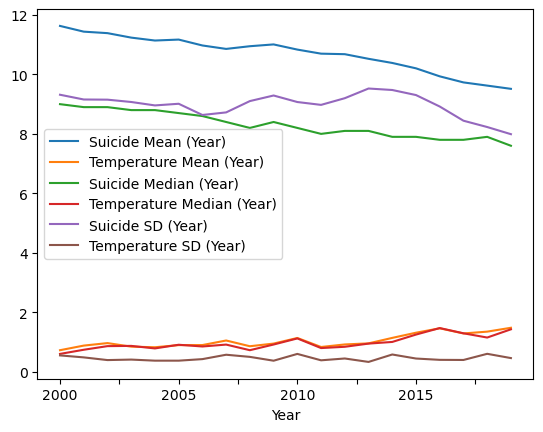

In [128]:
stanalysis_year_df.plot(xlabel = 'Year')
plt.show()

**Scatter plot**

Country-wise

<Axes: xlabel='Suicide Mean (Country)', ylabel='Temperature Mean (Country)'>

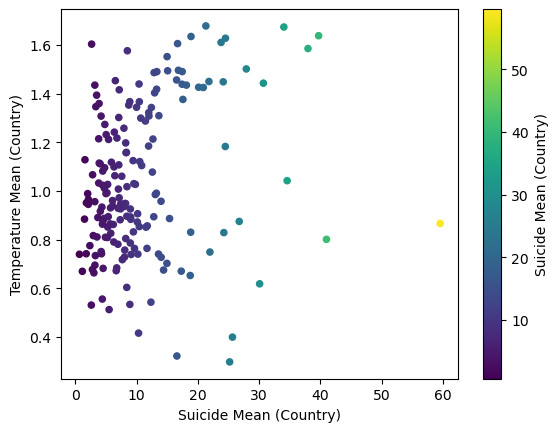

In [132]:
# Plotting the mean using scatter plot
stanalysis_country_df.plot(kind= 'scatter', 
                   x= 'Suicide Mean (Country)', 
                   y= 'Temperature Mean (Country)', 
                   c = 'Suicide Mean (Country)',
                   colormap='viridis')

<Axes: xlabel='Suicide Median (Country)', ylabel='Temperature Median (Country)'>

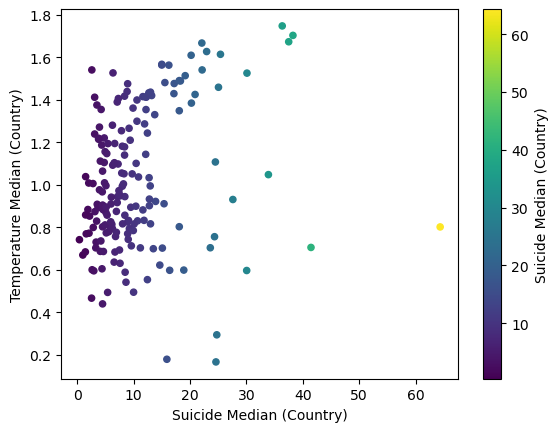

In [187]:
# Plotting the median using scatter plot
stanalysis_country_df.plot(kind= 'scatter', 
                   x= 'Suicide Median (Country)', 
                   y= 'Temperature Median (Country)', 
                   c = 'Suicide Median (Country)',
                   colormap='viridis')

<Axes: xlabel='Suicide SD (Country)', ylabel='Temperature SD (Country)'>

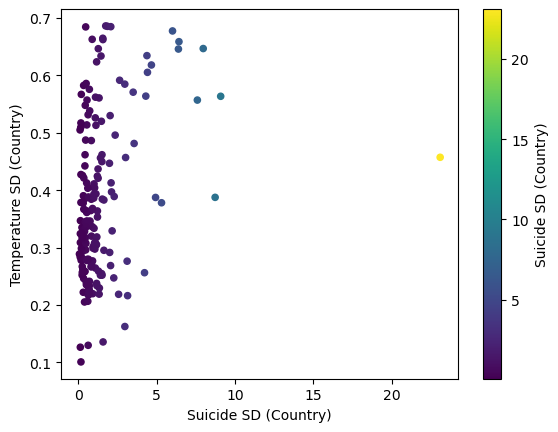

In [184]:
# Plotting the standard deviation using scatter plot
stanalysis_country_df.plot(kind= 'scatter', 
                   x= 'Suicide SD (Country)', 
                   y= 'Temperature SD (Country)', 
                   c = 'Suicide SD (Country)',
                   colormap='viridis')

<Axes: xlabel='Suicide SD (Country)', ylabel='Temperature SD (Country)'>

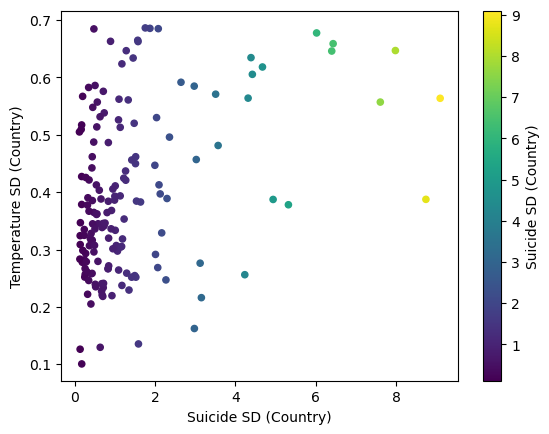

In [188]:
# Removing outliers by using the different conditions to visualise it more clearly
NoOutlier_gdf = stanalysis_country_gdf[(stanalysis_country_gdf['Suicide SD (Country)'] < 10)] # Filter using Suicide standard deviation
NoOutlier_gdf.plot(kind= 'scatter', 
                   x= 'Suicide SD (Country)', 
                   y= 'Temperature SD (Country)', 
                   c = 'Suicide SD (Country)',
                   colormap='viridis') # Plot scatter with Suicide standard deviation as x and Temperature standard deviation as y

##### Year-wise

<Axes: xlabel='Suicide Mean (Year)', ylabel='Temperature Mean (Year)'>

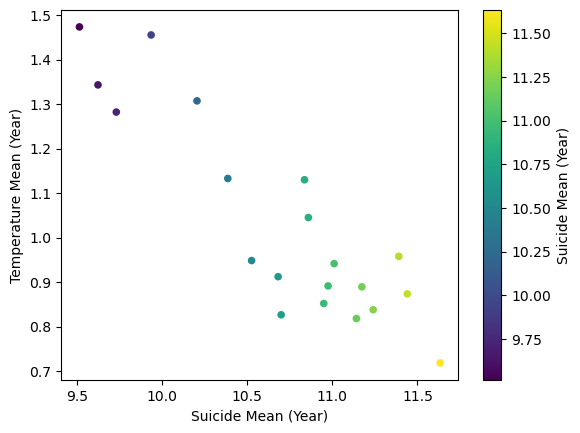

In [209]:
# Plotting the mean using scatter plot
stanalysis_year_df.plot(kind= 'scatter', 
                   x= 'Suicide Mean (Year)', 
                   y= 'Temperature Mean (Year)', 
                   c = 'Suicide Mean (Year)',
                   colormap='viridis')

<Axes: xlabel='Suicide Median (Year)', ylabel='Temperature Median (Year)'>

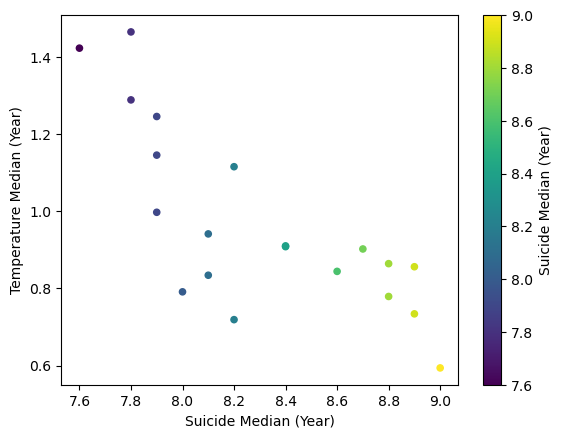

In [210]:
# Plotting the median using scatter plot
stanalysis_year_df.plot(kind= 'scatter', 
                   x= 'Suicide Median (Year)', 
                   y= 'Temperature Median (Year)', 
                   c = 'Suicide Median (Year)',
                   colormap='viridis')

<Axes: xlabel='Suicide SD (Year)', ylabel='Temperature SD (Year)'>

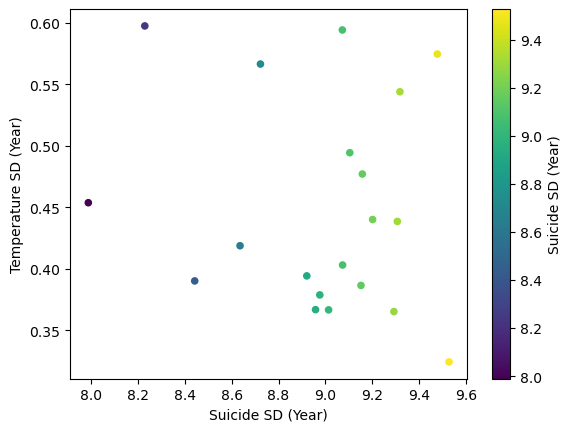

In [211]:
# Plotting the standard deviation using scatter plot
stanalysis_year_df.plot(kind= 'scatter', 
                   x= 'Suicide SD (Year)', 
                   y= 'Temperature SD (Year)', 
                   c = 'Suicide SD (Year)',
                   colormap='viridis')